In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score, roc_curve, auc

In [5]:
# Load your training dataset
df_train = pd.read_csv('/kaggle/input/playground-series-s3e17/train.csv', index_col='id')

In [16]:
df_train.head(10)

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
id,,,,,,
0,300.6,309.6,1596,36.1,140,0
1,302.6,312.1,1759,29.1,200,0
2,299.3,308.5,1805,26.5,25,0
3,301.0,310.9,1524,44.3,197,0
4,298.0,309.0,1641,35.4,34,0
5,298.4,308.9,1429,42.1,65,0
6,299.6,311.0,1413,42.9,156,0
7,298.7,310.1,1609,38.1,67,0
8,297.7,308.8,1578,35.2,13,0


In [6]:
# Dividing the dataset into features and label columns
features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
target = 'Machine failure'


In [7]:
# Select features and target
df_train = df_train[features + [target]]

In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_train[features], df_train[target], test_size=0.2, random_state=42)

In [9]:
# Create a pipeline with StandardScaler and Logistic Regression
model = make_pipeline(StandardScaler(), LogisticRegression())

# Train the model
model.fit(X_train, y_train)

# Evaluate the model on the test set
accuracy = model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.98


/tmp/ipykernel_33/4010285561.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


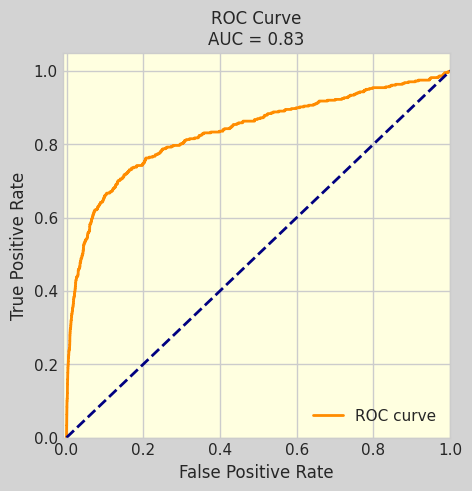

In [11]:
# ROC curve and AUC
def plot_roc_curve(true_list, pred_list, a=5, b=5):
    fpr, tpr, _ = roc_curve(true_list, pred_list)
    roc_auc = auc(fpr, tpr)

    sns.set()
    plt.style.use('seaborn-whitegrid')
    plt.figure(figsize=(a, b), facecolor='lightgray')
    plt.gca().set_facecolor('lightyellow')
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([-0.01, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve\nAUC = {:.2f}'.format(roc_auc))
    plt.legend(loc="lower right")
    plt.show()

plot_roc_curve(y_test, model.predict_proba(X_test)[:, 1])


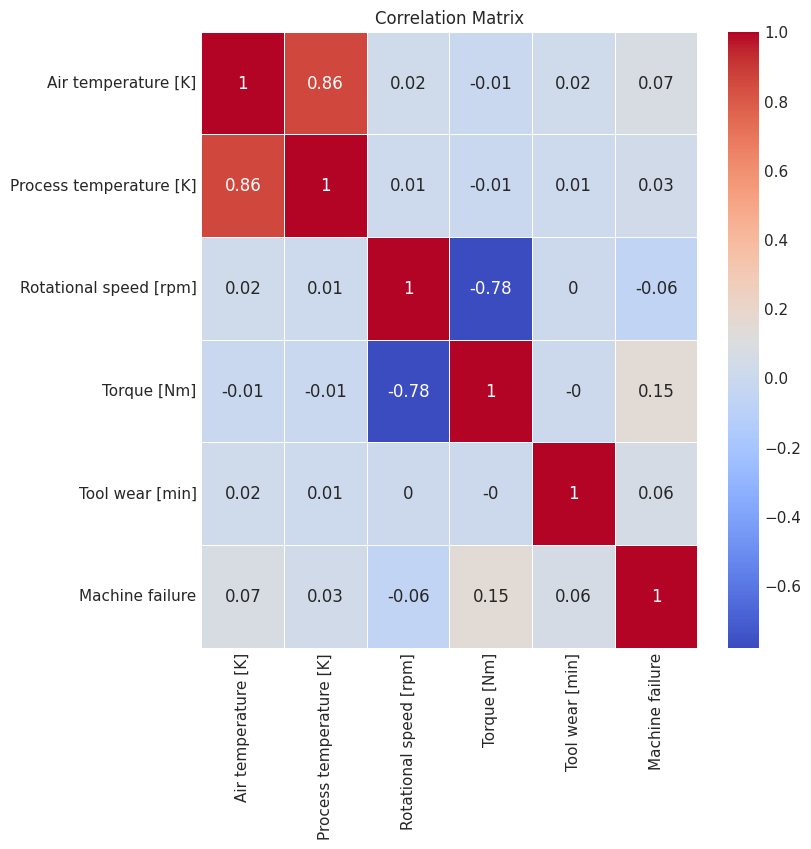

In [12]:
# Heatmap
cor_matrix = df_train.corr().round(2)
plt.figure(figsize=(8, 8))
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

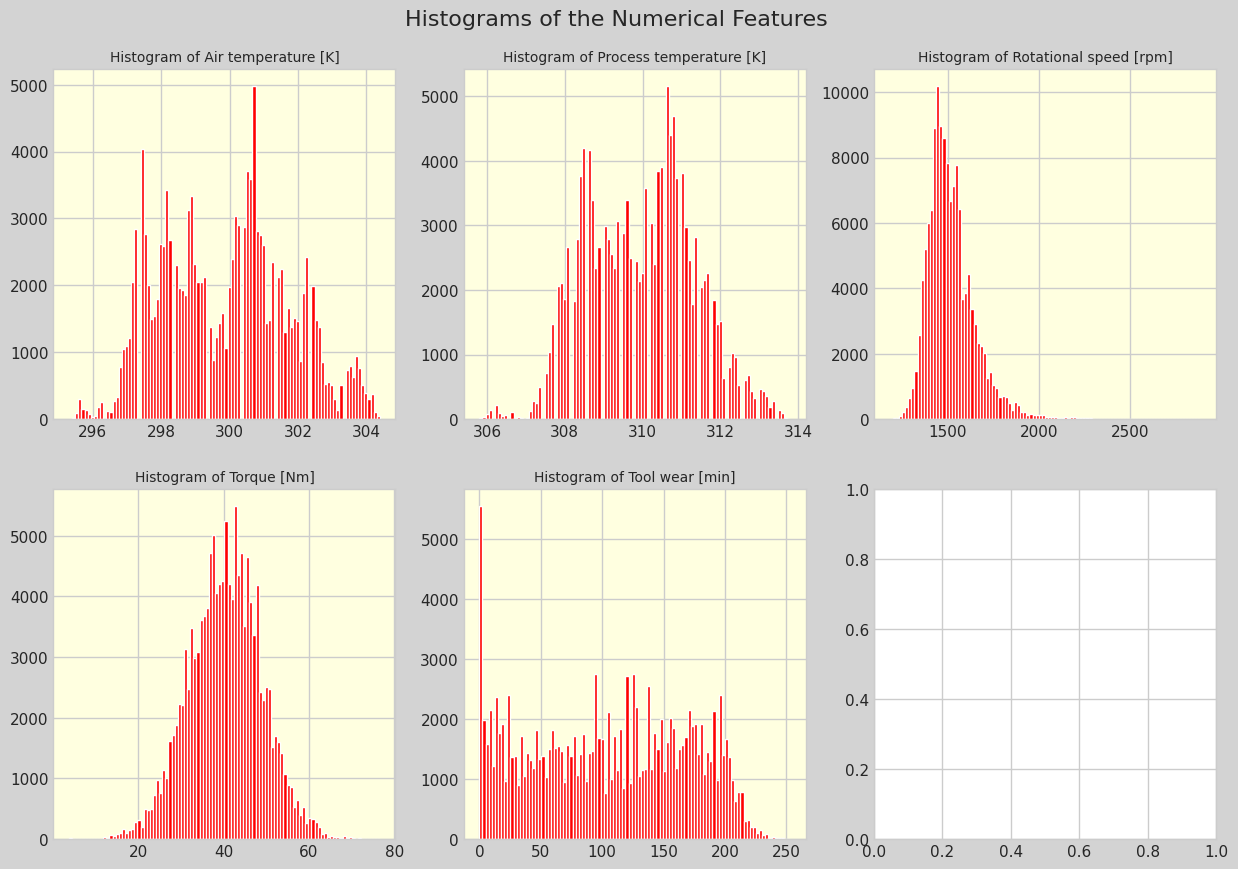

In [13]:
# Histograms
_, axs = plt.subplots(2, 3, figsize=(15, 10), facecolor='lightgray')
for f, ax in zip(features, axs.ravel()):
    ax.set_facecolor('lightyellow')
    ax.hist(df_train[f], bins=100, color='red')
    ax.set_title(f'Histogram of {f}', fontsize=10)

plt.suptitle('Histograms of the Numerical Features', y=0.94, fontsize=16)
plt.show()

In [14]:
# Predictions for failure using input values
input_values = [[20, 300, 400, 2000, 50]]
input_df = pd.DataFrame(input_values, columns=features)
input_pred = model.predict_proba(input_df)[:, 1]

print(f"Predictions for failure using input values: {input_pred}")

Predictions for failure using input values: [1.]


In [18]:
# Predictions for failure using input values
input_values = [[301, 310, 1596, 36, 140]]
input_df = pd.DataFrame(input_values, columns=features)
input_pred = model.predict_proba(input_df)[:, 1]

print(f"Predictions for failure using input values: {input_pred}")

Predictions for failure using input values: [0.01042167]
